In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('dataset.csv',low_memory=False)# sep=',', on_bad_lines='skip', index_col=False, dtype='unicode')
dataset.value_counts('Topic')

Topic
Asthma    80342
dtype: int64

In [3]:
asthma = dataset.loc[dataset['Topic'] == 'Asthma']
asthma

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80337,2020,2020,WY,Wyoming,BRFSS,Asthma,Influenza vaccination among noninstitutionaliz...,NaN,%,Age-adjusted Prevalence,...,56,AST,AST5_1,AGEADJPREV,RACE,BLK,NaN,NaN,NaN,NaN
80338,2020,2020,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,NaN,%,Age-adjusted Prevalence,...,56,AST,AST6_2,AGEADJPREV,RACE,BLK,NaN,NaN,NaN,NaN
80339,2020,2020,WY,Wyoming,BRFSS,Asthma,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,...,56,AST,AST5_2,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
80340,2020,2020,WY,Wyoming,BRFSS,Asthma,Pneumococcal vaccination among noninstitutiona...,NaN,%,Crude Prevalence,...,56,AST,AST6_2,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN


In [4]:
print('In the DataValueType, there are two types of interest, and those interest are the Age-adjusted Prevalence and the Crude Prevalence. And according to this sources [https://health.mo.gov/data/documentation/crude-aarate.php#:~:text=A%20crude%20rate%20is%20defined,1%2C000%2C%2010%2C000%2C%20or%20100%2C000.] and [https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod5_age.html#:~:text=It%20is%20important%20to%20remember,and%20Age-Adjusted%20Death%20Rates], Crude Rate is a basic calculation that measures the number of events (birthds, deaths, etc...) over a certain time. While the Age-adjusted Prevalance are not the actual rates of death or disease in the population.')

In the DataValueType, there are two types of interest, and those interest are the Age-adjusted Prevalence and the Crude Prevalence. And according to this sources [https://health.mo.gov/data/documentation/crude-aarate.php#:~:text=A%20crude%20rate%20is%20defined,1%2C000%2C%2010%2C000%2C%20or%20100%2C000.] and [https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod5_age.html#:~:text=It%20is%20important%20to%20remember,and%20Age-Adjusted%20Death%20Rates], Crude Rate is a basic calculation that measures the number of events (birthds, deaths, etc...) over a certain time. While the Age-adjusted Prevalance are not the actual rates of death or disease in the population.


In [5]:
asthma.value_counts('Question')

Question
Asthma mortality rate                                                                      13497
Current asthma prevalence among adults aged >= 18 years                                     9570
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma        9570
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma        9570
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma     9570
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma     9570
Hospitalizations for asthma                                                                 7812
Emergency department visit rate for asthma                                                  7608
Asthma prevalence among women aged 18-44 years                                              3575
dtype: int64

In [6]:
#I want to look at the total over time, focusing on Asthma.
#sorting the rows by ascending, with the use of YearStart.

asthma.sort_values(by='YearStart', inplace=True)

In [7]:
asthma.rename(columns={'YearStart': 'Year', 'LocationDesc': 'Location', 'Question': 'Theme', 'DataValueType': 'Disease Type', 'DataValue': 'Value'}, inplace=True)

In [8]:
asthma_mRate = asthma[["Year", "Location", "Theme", "Disease Type", "Value"]].copy()

#Selecting only Asthma mortality rate as theme
asthma_mRate = asthma_mRate[asthma_mRate.Theme == "Hospitalizations for asthma"]
threshold = len(asthma_mRate) * 0.8
asthma_mRate_cleaned_threshold = asthma_mRate.dropna(thresh=threshold)
asthma_mRate = asthma_mRate.dropna(subset=['Value'])
asthma_mRate

,Year,Location,Theme,Disease Type,Value
13719,2010,Massachusetts,Hospitalizations for asthma,Number,6131.00
13724,2010,South Carolina,Hospitalizations for asthma,Crude Rate,16.03
15740,2010,North Carolina,Hospitalizations for asthma,Crude Rate,13.34
16885,2010,New Mexico,Hospitalizations for asthma,Crude Rate,10.03
22629,2010,Mississippi,Hospitalizations for asthma,Number,1926.00
...,...,...,...,...,...
22608,2018,Washington,Hospitalizations for asthma,Number,957.00
22684,2018,South Carolina,Hospitalizations for asthma,Age-adjusted Rate,4.65
22680,2018,North Carolina,Hospitalizations for asthma,Age-adjusted Rate,2.74
5097,2018,Arizona,Hospitalizations for asthma,Number,52.00


In [9]:
#Taking the crude rates avgs for each location.
crude_Rate = asthma_mRate[asthma_mRate['Disease Type'] == 'Crude Rate']
crude_Rate.value_counts('Location')

Location
Wisconsin               56
Washington              56
Arizona                 56
North Carolina          56
Florida                 56
Oregon                  56
Michigan                55
New Jersey              53
Nevada                  52
Colorado                51
Iowa                    44
Maryland                44
Kentucky                43
New Mexico              42
South Dakota            39
Rhode Island            36
Arkansas                36
South Carolina          32
New York                32
West Virginia           31
Minnesota               30
District of Columbia    26
Hawaii                  25
Vermont                 24
Nebraska                21
Mississippi             21
Massachusetts           21
Georgia                 21
Utah                    13
Alaska                  13
Maine                    9
California               8
Delaware                 6
Indiana                  5
dtype: int64

In [10]:
#New York, Kentucky, New York, Michigan, and South Carolina are most represented. Let's use them for comparison.

cities = ['Kentucky', 'New York', 'Michigan', 'South Carolina']
four_cities = crude_Rate[crude_Rate['Location'].isin(cities)]
threshold = len(four_cities) * 0.8
four_cities_cleaned_threshold = four_cities.dropna(thresh=threshold)
four_cities = four_cities.dropna(subset=['Value'])
four_cities

,Year,Location,Theme,Disease Type,Value
13724,2010,South Carolina,Hospitalizations for asthma,Crude Rate,16.03
24320,2010,Michigan,Hospitalizations for asthma,Crude Rate,4.35
22637,2010,South Carolina,Hospitalizations for asthma,Crude Rate,9.86
13610,2010,Kentucky,Hospitalizations for asthma,Crude Rate,15.22
20740,2010,Kentucky,Hospitalizations for asthma,Crude Rate,4.30
...,...,...,...,...,...
14705,2018,Michigan,Hospitalizations for asthma,Crude Rate,4.95
23161,2018,South Carolina,Hospitalizations for asthma,Crude Rate,2.86
19399,2018,Michigan,Hospitalizations for asthma,Crude Rate,7.03
19511,2018,Michigan,Hospitalizations for asthma,Crude Rate,3.20


In [11]:
#CHECK dtypes - realise now Values should be numeric
four_cities.dtypes

four_cities['Value'] = pd.to_numeric(four_cities['Value'])
four_cities

,Year,Location,Theme,Disease Type,Value
13724,2010,South Carolina,Hospitalizations for asthma,Crude Rate,16.03
24320,2010,Michigan,Hospitalizations for asthma,Crude Rate,4.35
22637,2010,South Carolina,Hospitalizations for asthma,Crude Rate,9.86
13610,2010,Kentucky,Hospitalizations for asthma,Crude Rate,15.22
20740,2010,Kentucky,Hospitalizations for asthma,Crude Rate,4.30
...,...,...,...,...,...
14705,2018,Michigan,Hospitalizations for asthma,Crude Rate,4.95
23161,2018,South Carolina,Hospitalizations for asthma,Crude Rate,2.86
19399,2018,Michigan,Hospitalizations for asthma,Crude Rate,7.03
19511,2018,Michigan,Hospitalizations for asthma,Crude Rate,3.20


In [12]:
#We have repeating rows in 2012 for Cali and 2020 for Montana. Let's drop the lower values.
four_cities_cleaned = four_cities.drop_duplicates(subset='Year', keep='first')

four_cities_cleaned

,Year,Location,Theme,Disease Type,Value
13724,2010,South Carolina,Hospitalizations for asthma,Crude Rate,16.03
18797,2013,New York,Hospitalizations for asthma,Crude Rate,7.73
24071,2014,Michigan,Hospitalizations for asthma,Crude Rate,3.19
20127,2015,Michigan,Hospitalizations for asthma,Crude Rate,12.56
10574,2016,Michigan,Hospitalizations for asthma,Crude Rate,3.33
11260,2017,South Carolina,Hospitalizations for asthma,Crude Rate,4.92
23701,2018,Kentucky,Hospitalizations for asthma,Crude Rate,3.12


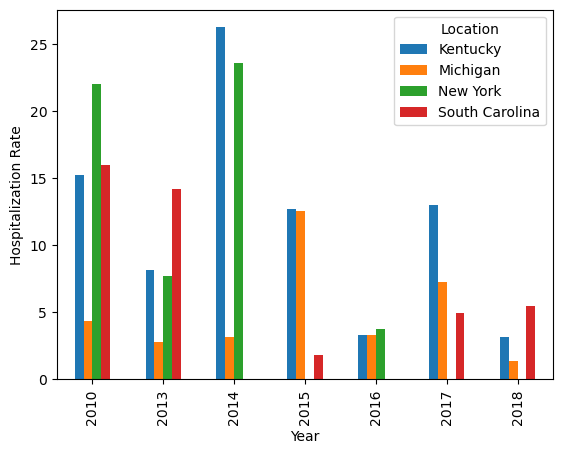

In [29]:
import matplotlib.pyplot as plt

four_cities_pivot = four_cities.pivot_table(index='Year', columns='Location', values='Value',aggfunc='first')

ax = four_cities_pivot.plot(kind='bar')
ax.set_xlabel('Year')
ax.set_ylabel('Hospitalization Rate')

plt.show()

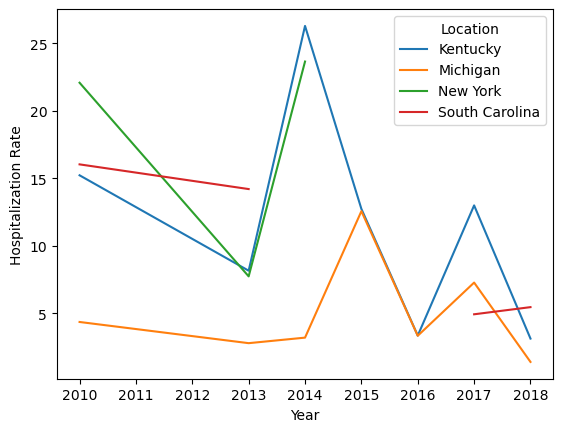

In [30]:
import matplotlib.pyplot as plt

four_cities_pivot = four_cities.pivot_table(index='Year', columns='Location', values='Value',aggfunc='first')

ax = four_cities_pivot.plot(kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Hospitalization Rate')

plt.show()